In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

# Comprehensive rcParams for publication-ready neurips paper - SET ONCE
plt.rcParams.update({
    'font.size': 24,
    'axes.labelsize': 28,
    'axes.titlesize': 30,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'legend.fontsize': 22,
    'lines.linewidth': 3,
    'lines.markersize': 12,
    'lines.markeredgewidth': 2.5,
    'legend.frameon': False,
    'figure.dpi': 300,
    'font.weight': 'normal',
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold',
    'grid.alpha': 0.3,
    'grid.linewidth': 1,
    'figure.figsize': (20, 6),
    'axes.grid': True,
})

print("Consistent matplotlib style applied for publication-ready plots")


Consistent matplotlib style applied for publication-ready plots


In [10]:
# Load only the necessary columns to save memory
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

COUNTRY = "mexico"
CROP_TYPE = 'beans_rainfed'


US_DATASET_FILE = '../data/khaki_soybeans/khaki_multi_crop_yield.csv'
OTHER_DATASET_FILE = f'../data/khaki_soybeans/khaki_{COUNTRY}_multi_crop.csv'
DATASET_FILE = US_DATASET_FILE if COUNTRY == 'usa' else OTHER_DATASET_FILE

# Read only required columns
df = pd.read_csv(DATASET_FILE, usecols=['year', "State", "County", f'{CROP_TYPE}_yield'])

print(df.head())

unique_locs = len(df.dropna().drop_duplicates(["State", "County"]))
print(f"Number of unique locations: {unique_locs}")

# Calculate mean yields by year
yearly_means = df.groupby('year').agg({
    f'{CROP_TYPE}_yield': 'mean',
}).reset_index()

UNIT = "Bu/A" if COUNTRY == "usa" else "Kg/H"
# if UNIT == "Kg/H":
#     yearly_means[f'{CROP_TYPE}_yield'] /= 1000.0


print("Data loaded and yearly means calculated.")
print(f"Year range: {yearly_means['year'].min()} to {yearly_means['year'].max()}")
print(f"Number of years: {len(yearly_means)}")
print("\nFirst few rows of calculated means:")
print(yearly_means.head())

            State           County  year  beans_rainfed_yield
0  Aguascalientes  Rincón de Romos  2003                290.0
1  Aguascalientes  Rincón de Romos  2003                290.0
2  Aguascalientes  Rincón de Romos  2004                160.0
3  Aguascalientes  Rincón de Romos  2004                160.0
4  Aguascalientes  Rincón de Romos  2005                  NaN
Number of unique locations: 1144
Data loaded and yearly means calculated.
Year range: 2003 to 2024
Number of years: 22

First few rows of calculated means:
   year  beans_rainfed_yield
0  2003           594.924242
1  2004           600.257634
2  2005           551.583665
3  2006           608.278765
4  2007           598.995305


max change positve and negative = -8.47%, 10.28%


/var/folders/gl/0n1kdnzj6h9690m2clm0274h0000gn/T/ipykernel_68957/358198274.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


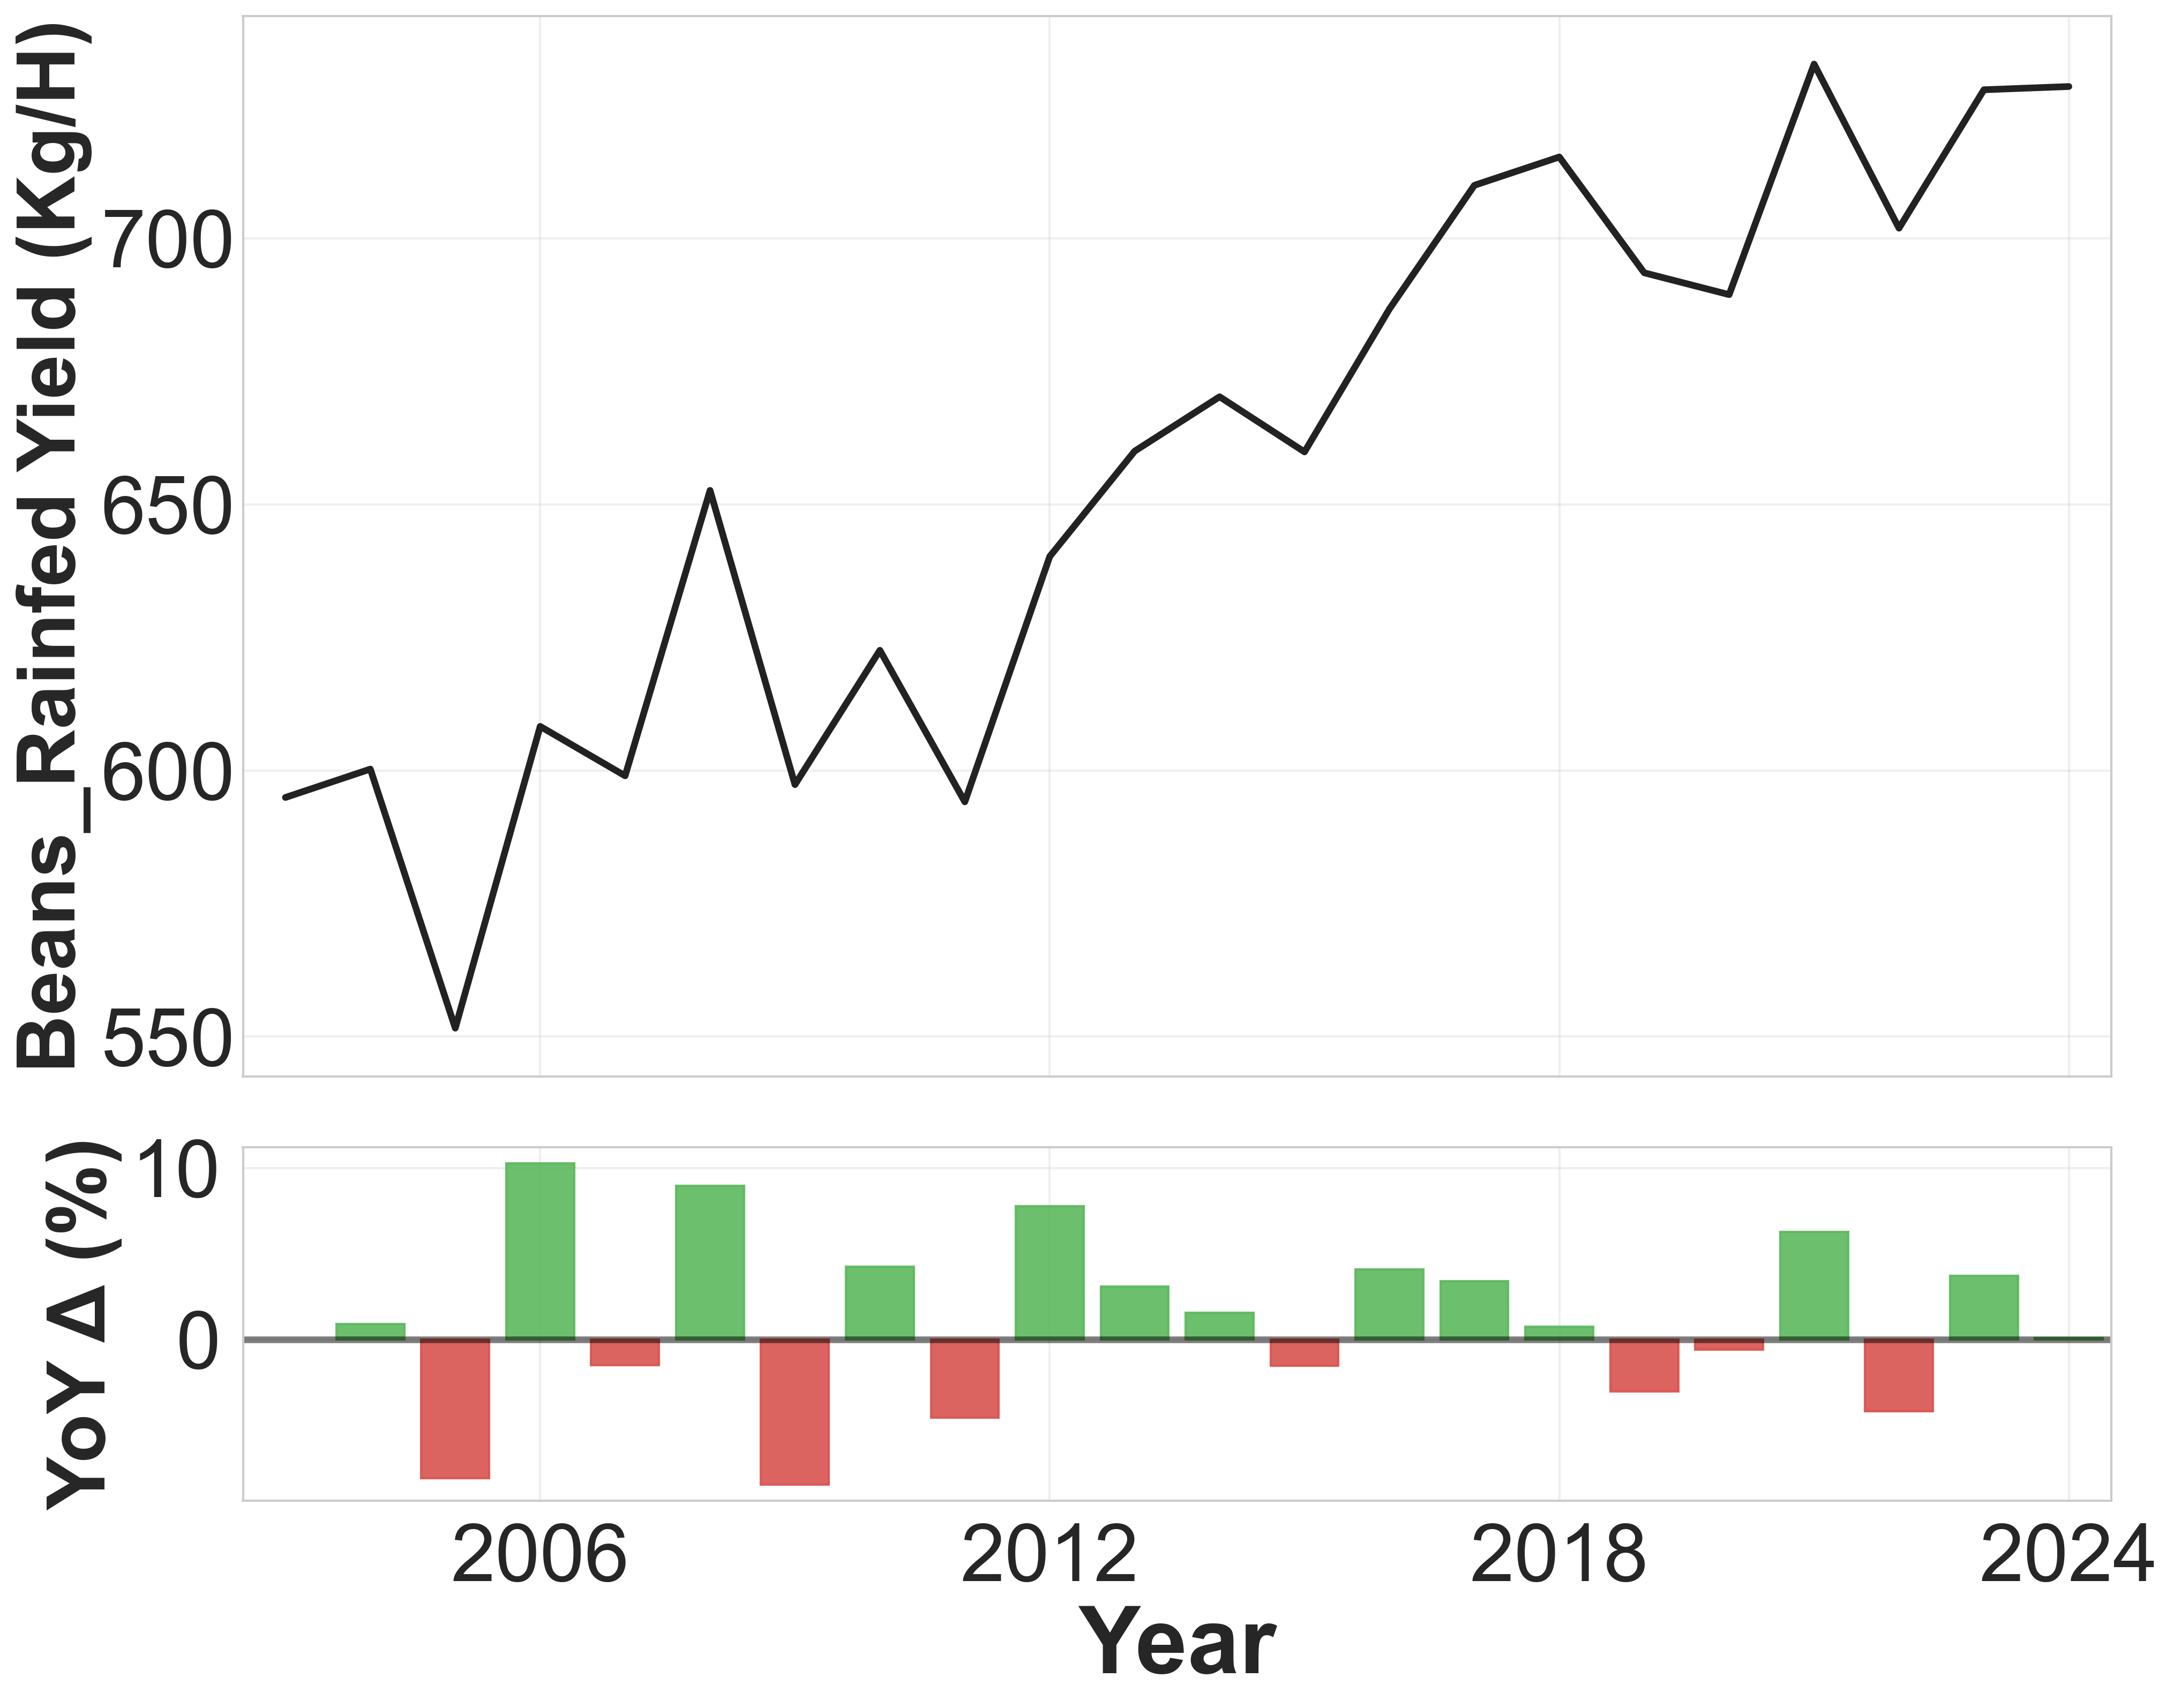

Plots saved with improved tick sizing and spacing.


In [11]:
# Compute YoY percentage changes
yearly_means[f'{CROP_TYPE}_yield_change'] = (yearly_means[f'{CROP_TYPE}_yield'].diff() / yearly_means[f'{CROP_TYPE}_yield'].shift(1)) * 100.0
yearly_means_filtered = yearly_means[yearly_means['year'] >= 1982].reset_index(drop=True)

# Colors
main_line_color = '#222222'
positive_change_color = '#5CB85C'
negative_change_color = '#D9534F'
x_min = max(1982, yearly_means_filtered['year'].min())
x_max = max(2018, yearly_means_filtered['year'].max())


def plot_yield_and_change(df, yield_col, change_col, crop_name, file_name):
    print(f"max change positve and negative = {df[change_col].min():.2f}%, {df[change_col].max():.2f}%")
    
    fig, (ax, axb) = plt.subplots(2, 1, figsize=(15, 12), height_ratios=[3, 1], sharex=True, gridspec_kw={'hspace': 0.1})

    # Line plot
    ax.plot(df['year'], df[yield_col], color=main_line_color)
    ax.set_ylabel(f'{crop_name} Yield ({UNIT})', fontsize=36)
    
    # Set ticker font sizes to 1.5x (24 * 1.5 = 36)
    ax.tick_params(axis='both', which='major', labelsize=36)

    # Bar plot
    bars = axb.bar(df['year'], df[change_col], alpha=0.9, width=0.8)
    axb.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    axb.set_ylabel('YoY Δ (%)', fontsize=36)
    axb.set_xlabel('Year', fontsize=42)  # Set x-axis font to 1.5x (28 * 1.5 = 42)
    axb.set_xticks(np.arange(1982, 2026, 6))
    axb.set_xlim(x_min - 0.5, x_max + 0.5)
    
    # Set ticker font sizes to 1.5x (24 * 1.5 = 36) and add padding
    axb.tick_params(axis='both', which='major', labelsize=36, pad=10)

    for bar, height in zip(bars, df[change_col]):
        bar.set_color(positive_change_color if height >= 0 else negative_change_color)

    plt.tight_layout()
    plt.savefig(file_name, format='pdf', bbox_inches='tight')
    plt.show()

# Generate plots
plot_yield_and_change(yearly_means_filtered, f'{CROP_TYPE}_yield', f'{CROP_TYPE}_yield_change', CROP_TYPE.title(), f'../data/latex/img/{CROP_TYPE}_yield_by_year_with_changes_{COUNTRY}.pdf')
print("Plots saved with improved tick sizing and spacing.")

In [12]:
print(f"Total number of rows: {len(df)}")

Total number of rows: 36965
